# EJERCICIO 1


## Apartado 1.1

El  problema  del  alquiler  de  la  vivienda  ya  forma  parte  del  contexto  de  la  mayoría  de  grandes  ciudades  del 
mundo. Hay varios factores que se enumeran como parte del problema: el turismo masivo, la distribución de 
las ciudades o el auge de los apartamentos turísticos como es el caso de Airbnb. Lo que si queda claro es que 
los datos obtenidos del portal sirven para obtener una radiografía más o menos valida de la ciudad. A través 
del dataset  proporcionado en Moodle en el que  se miden las estancias en los últimos años en la ciudad de 
New York. Hay varias preguntas que nos hacemos.

El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser 
un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos 
negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se 
puede decir que ostenta el barrio con respecto a los demás que forma New York? 

Procesamos a cargar y a visualizar nuestra base de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('airbnb.csv', encoding = 'latin_1')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


¿Tenemos datos incompletos o datos renundantes en nuestro set de datos?

In [3]:
data.isnull().values.any()

True

In [4]:
data.isnull().sum().sum()

20141

Esta función nos ayuda a saber cuántos datos nulos obtenemos. En el primer caso tenemos 20.141 atributos que son nulos. 

Ahora debemos de pensar que hacer con ellos, ¿Los eliminamos? o ¿Los completamos?


In [5]:
data.columns[data.isnull().any()]

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

  Con esta función vemos que columnas tienen valores nulos.
  Las columnas que son nulas son la de el nombre y el nombre del propietario del Airbnb, estas columnas no las vamos a tocar.
  
  Las últimas reseñas y las reseñas por mes también tienen atributos nulos, a estos valores los vamos a volver 0. Si observamos nuestro data frame, los valores que tienen nulos las últimas reseñas también los tienen para las reseñas del último mes. Las vamos a volver 0 porque si hacemos la media de estos, vamos a atribuirle un valor que no es cierto. 

In [6]:
data['last_review'].fillna(0, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


Observamos que los datos se han reemplazado adecuadamente.

Para medir  la popularidad/calidad del barrio, tendremos primero  en cuenta el número de apartamentos  de 
calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, 
“Regulares”, “Buenos” y “Muy Buenos”. 

La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que 
tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. 

In [7]:
data["reviews_per_month"]

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [8]:
max = data['reviews_per_month'].max()
min = data['reviews_per_month'].min()
max


58.5

El número mínimo es 0 y el número máximo es 58.5, como vamos a dividirlos en tres rangos diferentes los rangos irán desde una reseña baja: [0,19.5], una reseña media: [19.5,39] y una reseña alta [39,58.5].

In [9]:
#Calculamos los 2 cortes para partir el rango en 3
corte1 = min + (max - min) / 3 
corte2 = max + 2 * (max - min) / 3

#En el dataframe creamos una nueva columna donde etiquetamos las reseñas como baja, media y alta
data['Etiqueta_res'] = "Baja"
data.loc[(data['reviews_per_month'] > corte1) & (data['reviews_per_month'] <= corte2), 'Etiqueta_res'] = "Media"
data.loc[data['reviews_per_month'] > corte2, 'Etiqueta_res'] = "Alta"

In [10]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Etiqueta_res
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Baja
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Baja
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Baja
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Baja
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Baja
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Baja


Ahora queremos dividir una nueva variable, la de números de días disponibles. La queremos dividir en: poco disponible, normal y altamente.
Para ellos vamos a volver hacer lo que hemos hecho con la anterior. 

In [11]:
maxi = data['availability_365'].max()
mini = data['availability_365'].min()

In [12]:
mini

0

In [13]:
maxi

365

El mínimo es de 0 días disponible y el máximo es de los 365 días disponible.

In [14]:
#Calculamos los 2 cortes para partir el rango en 3
cor1 = mini + (maxi - mini) / 3 
cor2 = maxi + 2 * (maxi - mini) / 3

#En el dataframe creamos una nueva columna donde etiquetamos las reseñas como baja, media y alta
data['Etiquetas_disp'] = "Poco"
data.loc[(data['availability_365'] > corte1) & (data['availability_365'] <= corte2), 'Etiquetas_disp'] = "Normal"
data.loc[data['availability_365'] > corte2, 'Etiquetas_disp'] = "Altamente"

In [15]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Etiqueta_res,Etiquetas_disp
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Baja,Altamente
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Baja,Altamente
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Baja,Poco
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Baja,Normal
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Baja,Normal
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Baja,Poco


Una vez dividido las dos columnas que necesitábamos crearemos una nueva columna donde clasificaremos los apartamentos de la siguiente manera:


*   Si Reseñas es Baja y Disponibilidad es “Poco disponible” -> “Bueno” 
*   Si Reseñas es Media y Disponibilidad es “Poco disponible” -> “Bueno” 
*   Si Reseñas es Alta y Disponibilidad es “Poco disponible” -> “Muy Bueno” 
*   Si Reseñas es Baja y Disponibilidad es “Disponible normalmente” -> “Regular”
*   Si Reseñas es Media y Disponibilidad es “Disponible normalmente” -> “Regular” 
*   Si Reseñas es Alta y Disponibilidad es “Disponible normalmente” -> “Bueno” 
*   Si Reseñas es Baja y Disponibilidad es “Altamente disponible” -> “Malo”
*   Si Reseñas es Media y Disponibilidad es “Altamente disponible” -> “Malo”
*  Si Reseñas es alta y Disponibilidad es “Altamente disponible” -> “Muy malo” 
 

In [16]:
def clasificación(Etiqueta_res, Etiquetas_disp):
    if Etiqueta_res == "Baja" and Etiquetas_disp == "Poco":
        return "Bueno"
    elif Etiqueta_res == "Media" and Etiquetas_disp == "Poco":
        return "Bueno"
    elif Etiqueta_res == "Alta" and Etiquetas_disp == "Poco":
        return "MuyBueno"
    elif Etiqueta_res == "Baja" and Etiquetas_disp == "Normal":
        return "Regular"
    elif Etiqueta_res == "Media" and Etiquetas_disp == "Normal":
        return "Regular"
    elif Etiqueta_res == "Alta" and Etiquetas_disp == "Normal":
        return "Bueno"
    elif Etiqueta_res == "Baja" and Etiquetas_disp == "Altamente":
        return "Malo"
    elif Etiqueta_res == "Media" and Etiquetas_disp == "Altamente":
        return "Malo"
    elif Etiqueta_res == "Alta" and Etiquetas_disp == "Altamente":
        return "Muymalo"

data["Clasificación"] = data.apply(lambda x: clasificación(x["Etiqueta_res"], x["Etiquetas_disp"]), axis=1)

In [17]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Etiqueta_res,Etiquetas_disp,Clasificación
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Baja,Altamente,Malo
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Baja,Altamente,Malo
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Baja,Altamente,Malo
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Baja,Altamente,Malo
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Baja,Poco,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Baja,Poco,Bueno
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Baja,Normal,Regular
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Baja,Normal,Regular
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Baja,Poco,Bueno


Las columnas que hemos creado para clasificar los apartamentos no nos interesan, entonces las borramos de nuestro dataframe.

In [18]:
data.drop(columns=['Etiqueta_res', 'Etiquetas_disp'], inplace=True)

In [19]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Clasificación
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Malo
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Malo
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Malo
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Malo
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9,Bueno
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36,Regular
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27,Regular
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2,Bueno


### Barrio de Williamsburg

Creamos un dataframe donde solo nos interesa el barrio de **Williamsburg**

In [20]:
data2 = data[data["neighbourhood"] == "Williamsburg"]
data2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Clasificación
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,Regular
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0,Bueno
52,14290,* ORIGINAL BROOKLYN LOFT *,56104,James,Brooklyn,Williamsburg,40.70420,-73.93560,Entire home/apt,228,3,82,2019-05-17,0.70,1,140,Malo
55,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,105,2019-06-22,0.90,1,30,Regular
60,15385,"Very, very cozy place",60252,Cristina,Brooklyn,Williamsburg,40.71185,-73.96204,Private room,80,2,42,2019-06-30,0.38,1,263,Malo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48870,36474911,"Cozy, clean Williamsburg 1- bedroom apartment",1273444,Tanja,Brooklyn,Williamsburg,40.71197,-73.94946,Entire home/apt,99,4,0,0,0.00,1,22,Regular
48879,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,0,0.00,1,22,Regular
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0,0.00,3,365,Malo
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,0,0.00,1,341,Malo


Vamos a gráficar la frecuencia de la clasificaciíon del barrio de Williamsburg.

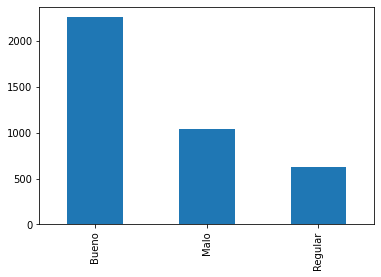

In [21]:
data2["Clasificación"].value_counts().plot.bar()

Viendo el gráfico vemos que se clasifica el barrio mayormente como un barrio bueno, seguidamente lo clasificamos como malo y algunos como regular. También observamos que no se ha clasificado en un barrio muy bueno y muy malo.

Veamos la frecuencia de bueno, malo y regular con números exactos.

In [22]:
frec_bueno = data2["Clasificación"].value_counts()["Bueno"]
frec_bueno

2259

In [23]:
frec_reg = data2["Clasificación"].value_counts()["Regular"]
frec_reg

625

In [24]:
frec_malo = data2["Clasificación"].value_counts()["Malo"]
frec_malo

1036

Podemos realizar otro tipo de gráfico para visualizar la frecuencia en %.

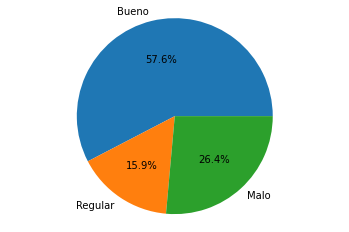

In [26]:
frec = [frec_bueno,frec_reg,frec_malo]
nom = ["Bueno", "Regular", "Malo"]
plt.pie(frec,labels=nom, autopct="%0.1f%%")
plt.axis("equal")
plt.show()

Como ya habíamos observado las personas han clasificado mayormente, con un 57.6% al barrio de Williamsburg como un barrio bueno, con un 26.4% como un barrio malo y con un 15.9% como un barrio regular. 